In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_excel("./data1.xlsx", sheet_name="signup", header=0)

data1.head()

,user_id,sign_up,last_login,sign_up_month,last_login_month
0,1,2019-01-01,2019-06-03,2019-01-01,2019-06-01
1,2,2019-01-01,2019-11-02,2019-01-01,2019-11-01
2,3,2019-01-01,2019-01-23,2019-01-01,2019-01-01
3,4,2019-01-01,2019-04-19,2019-01-01,2019-04-01
4,5,2019-01-01,2019-06-25,2019-01-01,2019-06-01


In [5]:
data1 = data1.drop(labels=["sign_up_month", "last_login_month"], axis=1)

data1.head()

,user_id,sign_up,last_login
0,1,2019-01-01,2019-06-03
1,2,2019-01-01,2019-11-02
2,3,2019-01-01,2019-01-23
3,4,2019-01-01,2019-04-19
4,5,2019-01-01,2019-06-25


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10471 entries, 0 to 10470
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     10471 non-null  int64         
 1   sign_up     10471 non-null  datetime64[ns]
 2   last_login  10471 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 245.5 KB


In [7]:
data1["sign_up_month"] = data1["sign_up"].dt.strftime("%Y-%m")
data1

,user_id,sign_up,last_login,sign_up_month
0,1,2019-01-01,2019-06-03,2019-01
1,2,2019-01-01,2019-11-02,2019-01
2,3,2019-01-01,2019-01-23,2019-01
3,4,2019-01-01,2019-04-19,2019-01
4,5,2019-01-01,2019-06-25,2019-01
...,...,...,...,...
10466,10467,2019-12-31,2019-12-31,2019-12
10467,10468,2019-12-31,2019-12-31,2019-12
10468,10469,2019-12-31,2019-12-31,2019-12
10469,10470,2019-12-31,2019-12-31,2019-12


In [8]:
data1["last_login_month"] = data1["last_login"].dt.strftime("%Y-%m")
data1

,user_id,sign_up,last_login,sign_up_month,last_login_month
0,1,2019-01-01,2019-06-03,2019-01,2019-06
1,2,2019-01-01,2019-11-02,2019-01,2019-11
2,3,2019-01-01,2019-01-23,2019-01,2019-01
3,4,2019-01-01,2019-04-19,2019-01,2019-04
4,5,2019-01-01,2019-06-25,2019-01,2019-06
...,...,...,...,...,...
10466,10467,2019-12-31,2019-12-31,2019-12,2019-12
10467,10468,2019-12-31,2019-12-31,2019-12,2019-12
10468,10469,2019-12-31,2019-12-31,2019-12,2019-12
10469,10470,2019-12-31,2019-12-31,2019-12,2019-12


In [14]:
data1["last_login_month2"] = data1["last_login_month"]

In [22]:
pivot_table = pd.pivot_table(data=data1, values='last_login_month2', index=["sign_up_month"],
                             columns=['last_login_month'], aggfunc="count")

pivot_table

last_login_month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
sign_up_month,,,,,,,,,,,,
2019-01,109.0,21.0,46.0,28.0,42.0,19.0,24.0,20.0,18.0,22.0,20.0,59.0
2019-02,NaN,94.0,34.0,25.0,37.0,22.0,34.0,34.0,25.0,31.0,34.0,111.0
2019-03,NaN,NaN,86.0,27.0,35.0,37.0,26.0,41.0,42.0,43.0,37.0,171.0
2019-04,NaN,NaN,NaN,84.0,34.0,22.0,36.0,35.0,29.0,43.0,34.0,184.0
2019-05,NaN,NaN,NaN,NaN,74.0,37.0,29.0,27.0,33.0,47.0,45.0,238.0
2019-06,NaN,NaN,NaN,NaN,NaN,84.0,29.0,31.0,29.0,27.0,39.0,291.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,74.0,32.0,26.0,31.0,24.0,308.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,37.0,41.0,31.0,348.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,44.0,34.0,473.0


In [23]:
pivot_table["sum"] = pivot_table.sum(axis=1, min_count=1)

pivot_table

last_login_month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,sum
sign_up_month,,,,,,,,,,,,,
2019-01,109.0,21.0,46.0,28.0,42.0,19.0,24.0,20.0,18.0,22.0,20.0,59.0,428.0
2019-02,NaN,94.0,34.0,25.0,37.0,22.0,34.0,34.0,25.0,31.0,34.0,111.0,481.0
2019-03,NaN,NaN,86.0,27.0,35.0,37.0,26.0,41.0,42.0,43.0,37.0,171.0,545.0
2019-04,NaN,NaN,NaN,84.0,34.0,22.0,36.0,35.0,29.0,43.0,34.0,184.0,501.0
2019-05,NaN,NaN,NaN,NaN,74.0,37.0,29.0,27.0,33.0,47.0,45.0,238.0,530.0
2019-06,NaN,NaN,NaN,NaN,NaN,84.0,29.0,31.0,29.0,27.0,39.0,291.0,530.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,74.0,32.0,26.0,31.0,24.0,308.0,495.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,37.0,41.0,31.0,348.0,534.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,44.0,34.0,473.0,632.0


In [35]:
pv_retention = pd.DataFrame(index=pivot_table.index, columns=pivot_table.columns[0:12])

for i in range(12) : 
    pv_retention.iloc[i,i] = pivot_table["sum"][i]

    if i != 11 : 
        for k in range(12-(i+1)) : 
            pv_retention.iloc[i,k+i+1] = pv_retention.iloc[i,k+i] - pivot_table.iloc[i,k+i]

pv_retention

last_login_month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
sign_up_month,,,,,,,,,,,,
2019-01,428.0,319.0,298.0,252.0,224.0,182.0,163.0,139.0,119.0,101.0,79.0,59.0
2019-02,NaN,481.0,387.0,353.0,328.0,291.0,269.0,235.0,201.0,176.0,145.0,111.0
2019-03,NaN,NaN,545.0,459.0,432.0,397.0,360.0,334.0,293.0,251.0,208.0,171.0
2019-04,NaN,NaN,NaN,501.0,417.0,383.0,361.0,325.0,290.0,261.0,218.0,184.0
2019-05,NaN,NaN,NaN,NaN,530.0,456.0,419.0,390.0,363.0,330.0,283.0,238.0
2019-06,NaN,NaN,NaN,NaN,NaN,530.0,446.0,417.0,386.0,357.0,330.0,291.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,495.0,421.0,389.0,363.0,332.0,308.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0,457.0,420.0,379.0,348.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632.0,551.0,507.0,473.0


In [36]:
pv_rt_ratio = pd.DataFrame(index=pv_retention.index, columns=pv_retention.columns)

for i in range(12) : 
    for k in range(12) : 
        pv_rt_ratio.iloc[i,k] = round(pv_retention.iloc[i,k] / pv_retention.iloc[i,i],3)

pv_rt_ratio

last_login_month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
sign_up_month,,,,,,,,,,,,
2019-01,1.0,0.745,0.696,0.589,0.523,0.425,0.381,0.325,0.278,0.236,0.185,0.138
2019-02,NaN,1.0,0.805,0.734,0.682,0.605,0.559,0.489,0.418,0.366,0.301,0.231
2019-03,NaN,NaN,1.0,0.842,0.793,0.728,0.661,0.613,0.538,0.461,0.382,0.314
2019-04,NaN,NaN,NaN,1.0,0.832,0.764,0.721,0.649,0.579,0.521,0.435,0.367
2019-05,NaN,NaN,NaN,NaN,1.0,0.86,0.791,0.736,0.685,0.623,0.534,0.449
2019-06,NaN,NaN,NaN,NaN,NaN,1.0,0.842,0.787,0.728,0.674,0.623,0.549
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.851,0.786,0.733,0.671,0.622
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.856,0.787,0.71,0.652
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.872,0.802,0.748


In [39]:
pv_rt_ratio_zero = pv_rt_ratio.fillna(0)

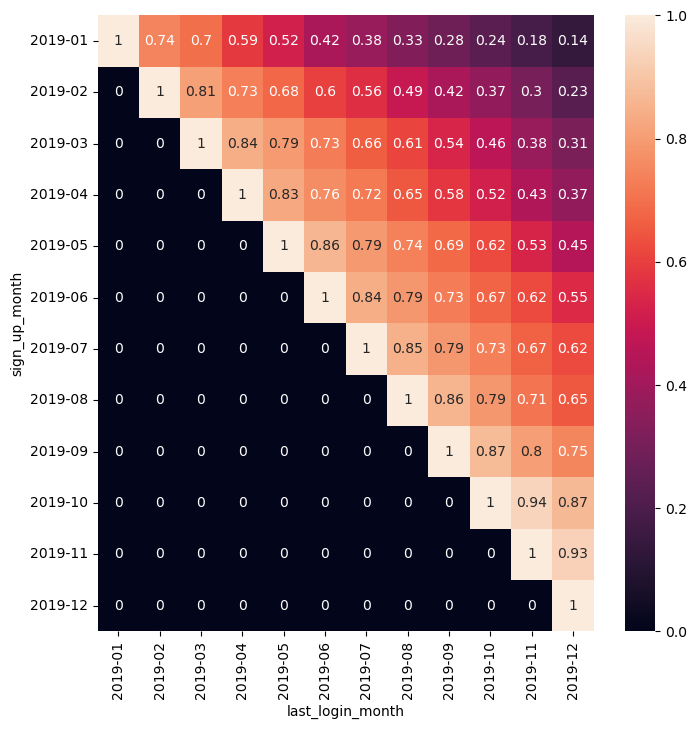

In [42]:
plt.figure(figsize=(8,8))

sns.heatmap(pv_rt_ratio_zero, annot=True)
plt.show()